In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('BGPDB.BGP_data.csv')

# Show the first 5 rows to check the data
df.head()


,timestamp,type,ip_address,prefix,as_path[0],as_path[1],as_path[2],as_path[3],as_path[4],as_path[5],...,as_path[17],as_path[18],as_path[19],as_path[20],additional_info[0],additional_info[1],additional_info[2],additional_info[3],additional_info[4],additional_info[5]
0,1734674400,B,87.121.64.4,0.0.0.0/0,57463,3356.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,1:1085 64700:3356 65400:1 65400:65500,NAG,NaN,NaN
1,1734674400,B,94.156.252.18,0.0.0.0/0,34224,3356.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,34224:333,NAG,NaN,NaN
2,1734674400,B,198.58.198.252,1.0.0.0/24,1403,13335.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,1403:1050,NAG,13335 162.158.124.1,NaN
3,1734674400,B,137.164.16.84,1.0.0.0/24,2152,13335.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,2152:65299 2152:65511 13335:10004 13335:19000 ...,NAG,13335 10.34.0.16,NaN
4,1734674400,B,37.139.139.17,1.0.0.0/24,57866,13335.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,13335:10020 13335:19020 13335:20050 13335:2050...,NAG,13335 10.34.6.80,NaN


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
file_path = 'BGPDB.BGP_data.csv'  # Update with your file path if needed
bgp_data = pd.read_csv(file_path)

# Step 2: Overview of the dataset
print("Dataset Head:\n", bgp_data.head())
print("\nDataset Info:\n")
bgp_data.info()
print("\nSummary Statistics:\n", bgp_data.describe())




Dataset Head:
     timestamp type      ip_address      prefix  as_path[0]  as_path[1]  \
0  1734674400    B     87.121.64.4   0.0.0.0/0       57463      3356.0   
1  1734674400    B   94.156.252.18   0.0.0.0/0       34224      3356.0   
2  1734674400    B  198.58.198.252  1.0.0.0/24        1403     13335.0   
3  1734674400    B   137.164.16.84  1.0.0.0/24        2152     13335.0   
4  1734674400    B   37.139.139.17  1.0.0.0/24       57866     13335.0   

   as_path[2]  as_path[3]  as_path[4]  as_path[5]  ...  as_path[17]  \
0         NaN         NaN         NaN         NaN  ...          NaN   
1         NaN         NaN         NaN         NaN  ...          NaN   
2         NaN         NaN         NaN         NaN  ...          NaN   
3         NaN         NaN         NaN         NaN  ...          NaN   
4         NaN         NaN         NaN         NaN  ...          NaN   

   as_path[18]  as_path[19]  as_path[20]  additional_info[0]  \
0          NaN          NaN          NaN         

In [3]:
# Step 3: Combine AS Path columns into a single column
as_path_columns = [col for col in bgp_data.columns if col.startswith('as_path')]
bgp_data['AS_Path'] = bgp_data[as_path_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [4]:
# Step 4: Add AS Path Length column
bgp_data['AS_Path_Length'] = bgp_data['AS_Path'].apply(lambda x: len(x.split(' ')) if isinstance(x, str) else np.nan)

In [5]:
# Step 5: Analyze routing trends

# (a) Frequency of route changes
route_changes = bgp_data.groupby('prefix')['type'].count().sort_values(ascending=False)
print("\nTop Prefixes by Update Frequency:\n", route_changes.head())

# (b) Longest AS paths
longest_as_paths = bgp_data.nlargest(5, 'AS_Path_Length')
print("\nTop 5 Longest AS Paths:\n", longest_as_paths[['prefix', 'AS_Path', 'AS_Path_Length']])

# (c) Patterns in withdrawn prefixes
withdrawn_prefixes = bgp_data[bgp_data['type'] == 'withdrawn']
print("\nWithdrawn Prefixes Summary:\n", withdrawn_prefixes['prefix'].value_counts().head())



Top Prefixes by Update Frequency:
 prefix
1.184.0.0/15     25
2.56.196.0/22    25
1.51.0.0/16      25
1.9.0.0/16       24
1.46.136.0/21    24
Name: type, dtype: int64

Top 5 Longest AS Paths:
              prefix                                            AS_Path  \
18297  1.22.28.0/24  2152.0 11164.0 4637.0 9498.0 55410.0 55410.0 5...   
18298  1.22.28.0/24  37100.0 6461.0 7473.0 9498.0 55410.0 55410.0 5...   
18313  1.22.28.0/24  49788.0 12552.0 4637.0 9498.0 55410.0 55410.0 ...   
22884  1.23.12.0/24  2152.0 11164.0 4637.0 9498.0 55410.0 55410.0 5...   
22885  1.23.12.0/24  37100.0 6461.0 7473.0 9498.0 55410.0 55410.0 5...   

       AS_Path_Length  
18297              21  
18298              21  
18313              21  
22884              21  
22885              21  

Withdrawn Prefixes Summary:
 Series([], Name: count, dtype: int64)


In [6]:
# Step 6: Detect anomalies

# (a) Sudden spikes in withdrawn prefixes
withdrawn_count = withdrawn_prefixes.groupby('timestamp').size()
withdrawn_spikes = withdrawn_count[withdrawn_count > withdrawn_count.mean() + 3 * withdrawn_count.std()]
print("\nTimestamps with Sudden Spikes in Withdrawn Prefixes:\n", withdrawn_spikes)

# (b) Longer-than-expected AS paths
threshold_as_length = bgp_data['AS_Path_Length'].mean() + 3 * bgp_data['AS_Path_Length'].std()
anomalous_as_paths = bgp_data[bgp_data['AS_Path_Length'] > threshold_as_length]
print("\nAnomalous AS Paths (Longer-than-expected):\n", anomalous_as_paths[['prefix', 'AS_Path', 'AS_Path_Length']])


Timestamps with Sudden Spikes in Withdrawn Prefixes:
 Series([], dtype: int64)

Anomalous AS Paths (Longer-than-expected):
               prefix                                            AS_Path  \
36        1.0.4.0/22  23673.0 7545.0 7545.0 7545.0 7545.0 7545.0 754...   
12941   1.11.71.0/24  3257.0 6453.0 3786.0 3786.0 3786.0 3786.0 3809...   
12946   1.11.71.0/24  3130.0 174.0 3786.0 3786.0 3786.0 3786.0 3786....   
13008   1.11.82.0/24  3257.0 6453.0 3786.0 3786.0 3786.0 3786.0 3809...   
13015   1.11.82.0/24  3130.0 174.0 3786.0 3786.0 3786.0 3786.0 3786....   
...              ...                                                ...   
93447   2.57.60.0/24  3257.0 15924.0 15924.0 15924.0 15924.0 15924.0...   
94566  2.57.156.0/22  57463.0 6939.0 8540.0 205584.0 205584.0 205584...   
94575  2.57.156.0/22  49788.0 6939.0 8540.0 205584.0 205584.0 205584...   
94576  2.57.156.0/22  3130.0 174.0 8540.0 205584.0 205584.0 205584.0...   
94578  2.57.156.0/22  6939.0 8540.0 205584.0 20558

In [7]:
bgp_data.head()

,timestamp,type,ip_address,prefix,as_path[0],as_path[1],as_path[2],as_path[3],as_path[4],as_path[5],...,as_path[19],as_path[20],additional_info[0],additional_info[1],additional_info[2],additional_info[3],additional_info[4],additional_info[5],AS_Path,AS_Path_Length
0,1734674400,B,87.121.64.4,0.0.0.0/0,57463,3356.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1:1085 64700:3356 65400:1 65400:65500,NAG,NaN,NaN,57463.0 3356.0,2
1,1734674400,B,94.156.252.18,0.0.0.0/0,34224,3356.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,34224:333,NAG,NaN,NaN,34224.0 3356.0,2
2,1734674400,B,198.58.198.252,1.0.0.0/24,1403,13335.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1403:1050,NAG,13335 162.158.124.1,NaN,1403.0 13335.0,2
3,1734674400,B,137.164.16.84,1.0.0.0/24,2152,13335.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,2152:65299 2152:65511 13335:10004 13335:19000 ...,NAG,13335 10.34.0.16,NaN,2152.0 13335.0,2
4,1734674400,B,37.139.139.17,1.0.0.0/24,57866,13335.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,13335:10020 13335:19020 13335:20050 13335:2050...,NAG,13335 10.34.6.80,NaN,57866.0 13335.0,2


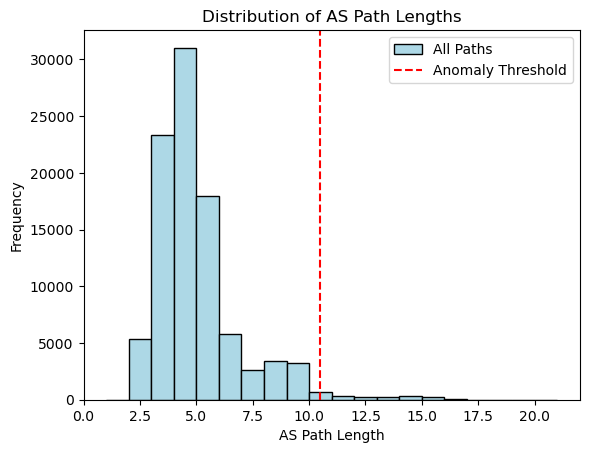

In [8]:
#Create a histogram of AS_Path_Length to compare the distribution and highlight the anomalies:
import matplotlib.pyplot as plt

plt.hist(bgp_data['AS_Path_Length'], bins=20, color='lightblue', edgecolor='black', label='All Paths')
plt.axvline(threshold_as_length, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Distribution of AS Path Lengths')
plt.xlabel('AS Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


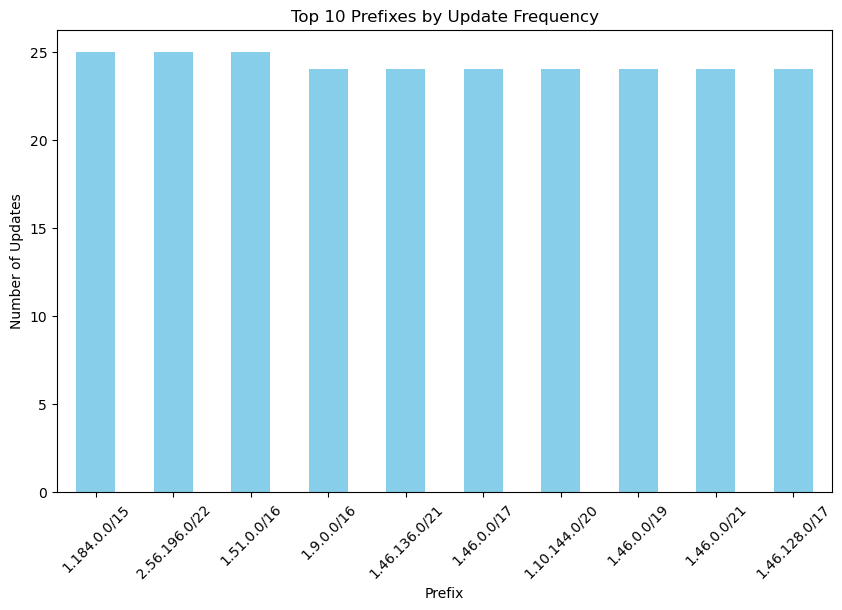

In [9]:
# Route changes visualization
plt.figure(figsize=(10, 6))
route_changes.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Prefixes by Update Frequency')
plt.ylabel('Number of Updates')
plt.xlabel('Prefix')
plt.xticks(rotation=45)
plt.show()

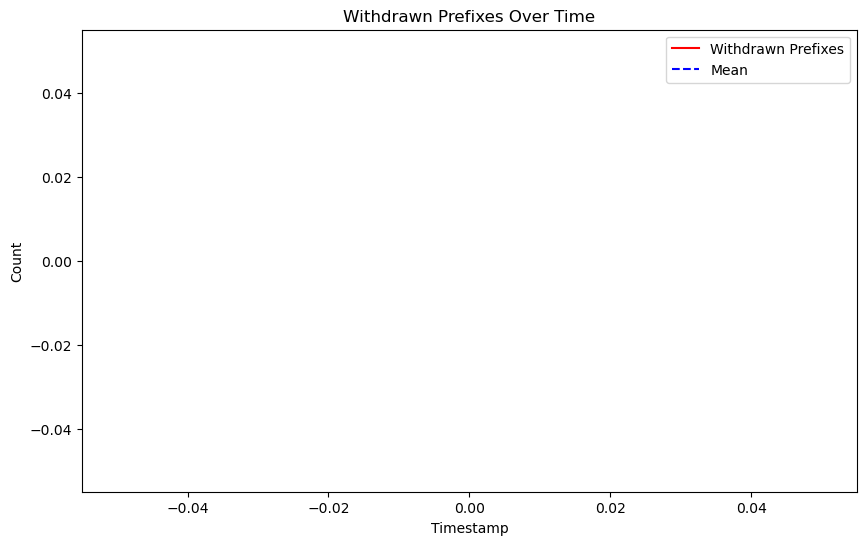

In [10]:
plt.figure(figsize=(10, 6))
withdrawn_count.plot(color='red', label='Withdrawn Prefixes')
plt.axhline(withdrawn_count.mean(), color='blue', linestyle='--', label='Mean')
plt.title('Withdrawn Prefixes Over Time')
plt.ylabel('Count')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

In [11]:
print(anomalous_as_paths[['prefix', 'AS_Path', 'AS_Path_Length']].head(10))


              prefix                                            AS_Path  \
36        1.0.4.0/22  23673.0 7545.0 7545.0 7545.0 7545.0 7545.0 754...   
12941   1.11.71.0/24  3257.0 6453.0 3786.0 3786.0 3786.0 3786.0 3809...   
12946   1.11.71.0/24  3130.0 174.0 3786.0 3786.0 3786.0 3786.0 3786....   
13008   1.11.82.0/24  3257.0 6453.0 3786.0 3786.0 3786.0 3786.0 3809...   
13015   1.11.82.0/24  3130.0 174.0 3786.0 3786.0 3786.0 3786.0 3786....   
13293  1.11.230.0/24  1403.0 577.0 2914.0 3786.0 38091.0 38091.0 380...   
13302  1.11.230.0/24  22652.0 1299.0 2914.0 3786.0 38091.0 38091.0 3...   
13306  1.11.230.0/24  3257.0 6453.0 3786.0 3786.0 3786.0 3786.0 3809...   
13309  1.11.230.0/24  3561.0 209.0 3356.0 3786.0 38091.0 38091.0 380...   
13311  1.11.230.0/24  3130.0 174.0 3786.0 3786.0 3786.0 3786.0 3786....   

       AS_Path_Length  
36                 14  
12941              12  
12946              13  
13008              12  
13015              13  
13293              11  
13302 

In [12]:
# Select only the required columns
analysis_data = bgp_data[['timestamp', 'type', 'ip_address', 'prefix', 'AS_Path', 'AS_Path_Length']]
print(analysis_data.head())


    timestamp type      ip_address      prefix          AS_Path  \
0  1734674400    B     87.121.64.4   0.0.0.0/0   57463.0 3356.0   
1  1734674400    B   94.156.252.18   0.0.0.0/0   34224.0 3356.0   
2  1734674400    B  198.58.198.252  1.0.0.0/24   1403.0 13335.0   
3  1734674400    B   137.164.16.84  1.0.0.0/24   2152.0 13335.0   
4  1734674400    B   37.139.139.17  1.0.0.0/24  57866.0 13335.0   

   AS_Path_Length  
0               2  
1               2  
2               2  
3               2  
4               2  


In [19]:
print(analysis_data['timestamp'].min(), analysis_data['timestamp'].max())


NaT NaT


In [20]:
# Assuming 'timestamp' contains Unix timestamps in seconds
analysis_data['timestamp'] = pd.to_datetime(analysis_data['timestamp'], unit='s')

# If it's in milliseconds, use:
# analysis_data['timestamp'] = pd.to_datetime(analysis_data['timestamp'], unit='ms')


In [21]:
print(analysis_data['timestamp'].head())


Series([], Name: timestamp, dtype: datetime64[ns])


In [22]:
analysis_data = analysis_data[
    (analysis_data['timestamp'] >= '2024-12-01') &
    (analysis_data['timestamp'] <= '2024-12-20')
]
